## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0   7.520219   824.624936  0.488189  4.199152  1.499298
1  77.893040   657.056761  0.705440  8.263029  1.305966
2  26.334044  1657.852782  0.576949  2.737782  1.444660
3  25.393628  1597.705007  0.365614  2.309786  1.599138
4  91.049826  1273.926025  0.351625  1.374022  1.313793


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.07224 | train_mse: 5.34635 | train_mae: 1.70661 |  0:00:00s
epoch 1  | loss: 1.05868 | train_mse: 4.06452 | train_mae: 1.48833 |  0:00:00s
epoch 2  | loss: 0.84942 | train_mse: 3.15632 | train_mae: 1.35258 |  0:00:00s


epoch 3  | loss: 0.84427 | train_mse: 2.7161  | train_mae: 1.25528 |  0:00:00s
epoch 4  | loss: 0.94934 | train_mse: 2.36604 | train_mae: 1.17787 |  0:00:00s


epoch 5  | loss: 0.80327 | train_mse: 2.17648 | train_mae: 1.11659 |  0:00:00s
epoch 6  | loss: 0.71131 | train_mse: 1.81084 | train_mae: 1.01619 |  0:00:00s
epoch 7  | loss: 0.67968 | train_mse: 1.54876 | train_mae: 0.94413 |  0:00:00s


epoch 8  | loss: 0.60309 | train_mse: 1.30681 | train_mae: 0.8746  |  0:00:01s
epoch 9  | loss: 0.63556 | train_mse: 1.14158 | train_mae: 0.81428 |  0:00:01s
epoch 10 | loss: 0.49172 | train_mse: 1.041   | train_mae: 0.78082 |  0:00:01s


epoch 11 | loss: 0.57574 | train_mse: 0.97125 | train_mae: 0.76157 |  0:00:01s
epoch 12 | loss: 0.62874 | train_mse: 0.92022 | train_mae: 0.75029 |  0:00:01s
epoch 13 | loss: 0.47802 | train_mse: 0.85207 | train_mae: 0.71801 |  0:00:01s


epoch 14 | loss: 0.51322 | train_mse: 0.80248 | train_mae: 0.69901 |  0:00:01s
epoch 15 | loss: 0.50986 | train_mse: 0.73823 | train_mae: 0.67093 |  0:00:01s


epoch 16 | loss: 0.39599 | train_mse: 0.69194 | train_mae: 0.64896 |  0:00:01s
epoch 17 | loss: 0.43635 | train_mse: 0.64558 | train_mae: 0.63002 |  0:00:01s
epoch 18 | loss: 0.44669 | train_mse: 0.60711 | train_mae: 0.60985 |  0:00:02s


epoch 19 | loss: 0.38176 | train_mse: 0.58271 | train_mae: 0.59573 |  0:00:02s
epoch 20 | loss: 0.37966 | train_mse: 0.55833 | train_mae: 0.58167 |  0:00:02s
epoch 21 | loss: 0.53494 | train_mse: 0.54359 | train_mae: 0.57318 |  0:00:02s


epoch 22 | loss: 0.47199 | train_mse: 0.53354 | train_mae: 0.56814 |  0:00:02s
epoch 23 | loss: 0.45774 | train_mse: 0.51607 | train_mae: 0.56204 |  0:00:02s
epoch 24 | loss: 0.33913 | train_mse: 0.4979  | train_mae: 0.55023 |  0:00:02s


epoch 25 | loss: 0.31911 | train_mse: 0.45716 | train_mae: 0.53009 |  0:00:02s
epoch 26 | loss: 0.50493 | train_mse: 0.41675 | train_mae: 0.50868 |  0:00:02s
epoch 27 | loss: 0.33752 | train_mse: 0.42045 | train_mae: 0.50483 |  0:00:02s


epoch 28 | loss: 0.33759 | train_mse: 0.38174 | train_mae: 0.48101 |  0:00:03s
epoch 29 | loss: 0.3257  | train_mse: 0.35703 | train_mae: 0.46275 |  0:00:03s
epoch 30 | loss: 0.4043  | train_mse: 0.34016 | train_mae: 0.45459 |  0:00:03s


epoch 31 | loss: 0.40594 | train_mse: 0.32314 | train_mae: 0.44393 |  0:00:03s
epoch 32 | loss: 0.37181 | train_mse: 0.30755 | train_mae: 0.43435 |  0:00:03s
epoch 33 | loss: 0.29485 | train_mse: 0.29277 | train_mae: 0.42351 |  0:00:03s


epoch 34 | loss: 0.30224 | train_mse: 0.28246 | train_mae: 0.41395 |  0:00:03s
epoch 35 | loss: 0.28451 | train_mse: 0.28061 | train_mae: 0.41399 |  0:00:03s


epoch 36 | loss: 0.26081 | train_mse: 0.27728 | train_mae: 0.41056 |  0:00:03s
epoch 37 | loss: 0.29478 | train_mse: 0.26647 | train_mae: 0.40172 |  0:00:03s
epoch 38 | loss: 0.28262 | train_mse: 0.25137 | train_mae: 0.39455 |  0:00:03s


epoch 39 | loss: 0.37065 | train_mse: 0.23927 | train_mae: 0.38869 |  0:00:04s
epoch 40 | loss: 0.24362 | train_mse: 0.23217 | train_mae: 0.38441 |  0:00:04s
epoch 41 | loss: 0.29779 | train_mse: 0.22928 | train_mae: 0.38179 |  0:00:04s


epoch 42 | loss: 0.19728 | train_mse: 0.22364 | train_mae: 0.37759 |  0:00:04s
epoch 43 | loss: 0.3942  | train_mse: 0.20821 | train_mae: 0.36378 |  0:00:04s
epoch 44 | loss: 0.2349  | train_mse: 0.2024  | train_mae: 0.3573  |  0:00:04s


epoch 45 | loss: 0.2259  | train_mse: 0.19911 | train_mae: 0.35723 |  0:00:04s
epoch 46 | loss: 0.2106  | train_mse: 0.1899  | train_mae: 0.34761 |  0:00:04s


epoch 47 | loss: 0.40508 | train_mse: 0.18412 | train_mae: 0.34067 |  0:00:04s
epoch 48 | loss: 0.26075 | train_mse: 0.17446 | train_mae: 0.33041 |  0:00:04s
epoch 49 | loss: 0.23137 | train_mse: 0.17043 | train_mae: 0.32852 |  0:00:04s


epoch 50 | loss: 0.38627 | train_mse: 0.16745 | train_mae: 0.32523 |  0:00:05s
epoch 51 | loss: 0.16546 | train_mse: 0.16285 | train_mae: 0.31917 |  0:00:05s
epoch 52 | loss: 0.27749 | train_mse: 0.1587  | train_mae: 0.31444 |  0:00:05s


epoch 53 | loss: 0.20202 | train_mse: 0.1502  | train_mae: 0.30303 |  0:00:05s
epoch 54 | loss: 0.30097 | train_mse: 0.14274 | train_mae: 0.29489 |  0:00:05s
epoch 55 | loss: 0.21236 | train_mse: 0.13665 | train_mae: 0.28817 |  0:00:05s


epoch 56 | loss: 0.27985 | train_mse: 0.1354  | train_mae: 0.28547 |  0:00:05s
epoch 57 | loss: 0.27873 | train_mse: 0.13336 | train_mae: 0.28321 |  0:00:05s


epoch 58 | loss: 0.22667 | train_mse: 0.1322  | train_mae: 0.28167 |  0:00:05s
epoch 59 | loss: 0.32388 | train_mse: 0.1292  | train_mae: 0.28171 |  0:00:05s
epoch 60 | loss: 0.15102 | train_mse: 0.12515 | train_mae: 0.27938 |  0:00:05s


epoch 61 | loss: 0.24453 | train_mse: 0.12497 | train_mae: 0.27929 |  0:00:06s
epoch 62 | loss: 0.28336 | train_mse: 0.12302 | train_mae: 0.28177 |  0:00:06s
epoch 63 | loss: 0.38503 | train_mse: 0.11903 | train_mae: 0.28336 |  0:00:06s


epoch 64 | loss: 0.25138 | train_mse: 0.11452 | train_mae: 0.27915 |  0:00:06s
epoch 65 | loss: 0.44882 | train_mse: 0.11276 | train_mae: 0.27664 |  0:00:06s
epoch 66 | loss: 0.29027 | train_mse: 0.11063 | train_mae: 0.27294 |  0:00:06s


epoch 67 | loss: 0.16619 | train_mse: 0.10777 | train_mae: 0.26717 |  0:00:06s
epoch 68 | loss: 0.25304 | train_mse: 0.10523 | train_mae: 0.2608  |  0:00:06s


epoch 69 | loss: 0.22692 | train_mse: 0.10639 | train_mae: 0.26116 |  0:00:06s
epoch 70 | loss: 0.21663 | train_mse: 0.1089  | train_mae: 0.26798 |  0:00:06s


epoch 71 | loss: 0.19648 | train_mse: 0.10984 | train_mae: 0.26913 |  0:00:07s
epoch 72 | loss: 0.19547 | train_mse: 0.10886 | train_mae: 0.26765 |  0:00:07s
epoch 73 | loss: 0.15588 | train_mse: 0.10966 | train_mae: 0.26501 |  0:00:07s


epoch 74 | loss: 0.12758 | train_mse: 0.10923 | train_mae: 0.26256 |  0:00:07s
epoch 75 | loss: 0.20032 | train_mse: 0.1101  | train_mae: 0.26003 |  0:00:07s
epoch 76 | loss: 0.26268 | train_mse: 0.1101  | train_mae: 0.25865 |  0:00:07s


epoch 77 | loss: 0.16221 | train_mse: 0.11038 | train_mae: 0.25883 |  0:00:07s
epoch 78 | loss: 0.23673 | train_mse: 0.10902 | train_mae: 0.26089 |  0:00:07s
epoch 79 | loss: 0.22543 | train_mse: 0.10813 | train_mae: 0.26047 |  0:00:07s


epoch 80 | loss: 0.15967 | train_mse: 0.10625 | train_mae: 0.25855 |  0:00:08s
epoch 81 | loss: 0.2228  | train_mse: 0.10357 | train_mae: 0.25585 |  0:00:08s
epoch 82 | loss: 0.29149 | train_mse: 0.10287 | train_mae: 0.25709 |  0:00:08s


epoch 83 | loss: 0.29945 | train_mse: 0.1038  | train_mae: 0.26019 |  0:00:08s
epoch 84 | loss: 0.26521 | train_mse: 0.10637 | train_mae: 0.26332 |  0:00:08s
epoch 85 | loss: 0.16596 | train_mse: 0.10604 | train_mae: 0.26077 |  0:00:08s


epoch 86 | loss: 0.17146 | train_mse: 0.1035  | train_mae: 0.25762 |  0:00:08s
epoch 87 | loss: 0.16576 | train_mse: 0.10305 | train_mae: 0.25488 |  0:00:08s
epoch 88 | loss: 0.24946 | train_mse: 0.1007  | train_mae: 0.25292 |  0:00:08s


epoch 89 | loss: 0.20183 | train_mse: 0.10081 | train_mae: 0.25347 |  0:00:08s
epoch 90 | loss: 0.19538 | train_mse: 0.09853 | train_mae: 0.25131 |  0:00:08s


epoch 91 | loss: 0.22332 | train_mse: 0.0951  | train_mae: 0.24671 |  0:00:09s
epoch 92 | loss: 0.18947 | train_mse: 0.09261 | train_mae: 0.24343 |  0:00:09s
epoch 93 | loss: 0.11813 | train_mse: 0.08923 | train_mae: 0.23937 |  0:00:09s


epoch 94 | loss: 0.29476 | train_mse: 0.08911 | train_mae: 0.2382  |  0:00:09s
epoch 95 | loss: 0.17841 | train_mse: 0.0874  | train_mae: 0.23508 |  0:00:09s
epoch 96 | loss: 0.21467 | train_mse: 0.08626 | train_mae: 0.23537 |  0:00:09s


epoch 97 | loss: 0.24903 | train_mse: 0.08461 | train_mae: 0.23371 |  0:00:09s
epoch 98 | loss: 0.1263  | train_mse: 0.08247 | train_mae: 0.2305  |  0:00:09s
epoch 99 | loss: 0.21028 | train_mse: 0.08158 | train_mae: 0.2276  |  0:00:09s


epoch 100| loss: 0.13095 | train_mse: 0.08071 | train_mae: 0.22602 |  0:00:09s
epoch 101| loss: 0.17475 | train_mse: 0.07969 | train_mae: 0.22352 |  0:00:09s
epoch 102| loss: 0.22979 | train_mse: 0.07939 | train_mae: 0.22201 |  0:00:10s


epoch 103| loss: 0.0919  | train_mse: 0.08064 | train_mae: 0.2249  |  0:00:10s
epoch 104| loss: 0.11847 | train_mse: 0.08189 | train_mae: 0.2261  |  0:00:10s
epoch 105| loss: 0.14829 | train_mse: 0.08205 | train_mae: 0.22522 |  0:00:10s


epoch 106| loss: 0.24745 | train_mse: 0.08389 | train_mae: 0.22646 |  0:00:10s
epoch 107| loss: 0.13179 | train_mse: 0.08563 | train_mae: 0.22817 |  0:00:10s
epoch 108| loss: 0.27707 | train_mse: 0.08483 | train_mae: 0.22762 |  0:00:10s


epoch 109| loss: 0.11198 | train_mse: 0.0821  | train_mae: 0.22508 |  0:00:10s
epoch 110| loss: 0.29911 | train_mse: 0.07899 | train_mae: 0.22124 |  0:00:10s
epoch 111| loss: 0.18228 | train_mse: 0.07901 | train_mae: 0.22244 |  0:00:10s


epoch 112| loss: 0.16475 | train_mse: 0.07726 | train_mae: 0.21961 |  0:00:10s
epoch 113| loss: 0.308   | train_mse: 0.07472 | train_mae: 0.2169  |  0:00:11s
epoch 114| loss: 0.19353 | train_mse: 0.07488 | train_mae: 0.2169  |  0:00:11s


epoch 115| loss: 0.19284 | train_mse: 0.07527 | train_mae: 0.21632 |  0:00:11s
epoch 116| loss: 0.248   | train_mse: 0.0745  | train_mae: 0.21498 |  0:00:11s
epoch 117| loss: 0.10576 | train_mse: 0.07234 | train_mae: 0.21453 |  0:00:11s


epoch 118| loss: 0.10973 | train_mse: 0.07287 | train_mae: 0.21739 |  0:00:11s
epoch 119| loss: 0.17492 | train_mse: 0.07032 | train_mae: 0.21538 |  0:00:11s
epoch 120| loss: 0.17403 | train_mse: 0.07124 | train_mae: 0.21861 |  0:00:11s


epoch 121| loss: 0.16365 | train_mse: 0.07156 | train_mae: 0.21994 |  0:00:11s
epoch 122| loss: 0.13439 | train_mse: 0.0713  | train_mae: 0.21842 |  0:00:11s
epoch 123| loss: 0.13858 | train_mse: 0.07373 | train_mae: 0.21675 |  0:00:11s


epoch 124| loss: 0.13896 | train_mse: 0.0778  | train_mae: 0.21992 |  0:00:12s
epoch 125| loss: 0.18262 | train_mse: 0.08217 | train_mae: 0.22468 |  0:00:12s
epoch 126| loss: 0.17536 | train_mse: 0.08531 | train_mae: 0.22725 |  0:00:12s


epoch 127| loss: 0.27169 | train_mse: 0.08597 | train_mae: 0.22832 |  0:00:12s
epoch 128| loss: 0.15853 | train_mse: 0.08575 | train_mae: 0.22824 |  0:00:12s
epoch 129| loss: 0.18991 | train_mse: 0.08081 | train_mae: 0.22397 |  0:00:12s


epoch 130| loss: 0.16249 | train_mse: 0.07932 | train_mae: 0.22253 |  0:00:12s
epoch 131| loss: 0.14263 | train_mse: 0.07646 | train_mae: 0.2224  |  0:00:12s


epoch 132| loss: 0.15812 | train_mse: 0.0766  | train_mae: 0.22302 |  0:00:12s
epoch 133| loss: 0.16456 | train_mse: 0.07331 | train_mae: 0.21853 |  0:00:12s
epoch 134| loss: 0.21784 | train_mse: 0.07495 | train_mae: 0.21826 |  0:00:12s


epoch 135| loss: 0.11072 | train_mse: 0.07955 | train_mae: 0.22228 |  0:00:12s
epoch 136| loss: 0.24209 | train_mse: 0.08143 | train_mae: 0.22452 |  0:00:13s
epoch 137| loss: 0.1253  | train_mse: 0.0834  | train_mae: 0.2271  |  0:00:13s


epoch 138| loss: 0.17294 | train_mse: 0.08129 | train_mae: 0.22679 |  0:00:13s
epoch 139| loss: 0.1563  | train_mse: 0.08246 | train_mae: 0.23007 |  0:00:13s
epoch 140| loss: 0.20167 | train_mse: 0.08376 | train_mae: 0.23311 |  0:00:13s


epoch 141| loss: 0.09568 | train_mse: 0.08293 | train_mae: 0.2318  |  0:00:13s
epoch 142| loss: 0.12848 | train_mse: 0.07678 | train_mae: 0.22612 |  0:00:13s
epoch 143| loss: 0.11204 | train_mse: 0.07068 | train_mae: 0.21816 |  0:00:13s


epoch 144| loss: 0.17213 | train_mse: 0.06769 | train_mae: 0.21267 |  0:00:13s
epoch 145| loss: 0.23285 | train_mse: 0.06556 | train_mae: 0.20783 |  0:00:13s
epoch 146| loss: 0.32822 | train_mse: 0.06452 | train_mae: 0.20565 |  0:00:13s


epoch 147| loss: 0.12357 | train_mse: 0.06393 | train_mae: 0.20298 |  0:00:14s
epoch 148| loss: 0.17125 | train_mse: 0.06401 | train_mae: 0.20319 |  0:00:14s
epoch 149| loss: 0.21198 | train_mse: 0.06489 | train_mae: 0.20306 |  0:00:14s


epoch 150| loss: 0.13282 | train_mse: 0.06482 | train_mae: 0.20303 |  0:00:14s
epoch 151| loss: 0.12756 | train_mse: 0.06361 | train_mae: 0.20357 |  0:00:14s
epoch 152| loss: 0.28972 | train_mse: 0.06506 | train_mae: 0.2075  |  0:00:14s


epoch 153| loss: 0.15869 | train_mse: 0.06594 | train_mae: 0.20951 |  0:00:14s
epoch 154| loss: 0.27551 | train_mse: 0.06723 | train_mae: 0.21228 |  0:00:14s


epoch 155| loss: 0.11889 | train_mse: 0.06765 | train_mae: 0.21258 |  0:00:14s
epoch 156| loss: 0.0972  | train_mse: 0.06612 | train_mae: 0.21079 |  0:00:14s
epoch 157| loss: 0.12819 | train_mse: 0.06359 | train_mae: 0.20512 |  0:00:14s


epoch 158| loss: 0.1347  | train_mse: 0.06211 | train_mae: 0.20173 |  0:00:14s
epoch 159| loss: 0.08818 | train_mse: 0.06143 | train_mae: 0.19739 |  0:00:15s
epoch 160| loss: 0.14045 | train_mse: 0.06251 | train_mae: 0.19927 |  0:00:15s


epoch 161| loss: 0.11036 | train_mse: 0.0652  | train_mae: 0.2012  |  0:00:15s
epoch 162| loss: 0.10332 | train_mse: 0.06485 | train_mae: 0.20173 |  0:00:15s
epoch 163| loss: 0.15661 | train_mse: 0.06033 | train_mae: 0.19633 |  0:00:15s


epoch 164| loss: 0.13854 | train_mse: 0.05773 | train_mae: 0.19106 |  0:00:15s
epoch 165| loss: 0.18949 | train_mse: 0.05747 | train_mae: 0.19126 |  0:00:15s
epoch 166| loss: 0.10757 | train_mse: 0.05737 | train_mae: 0.19354 |  0:00:15s


epoch 167| loss: 0.17133 | train_mse: 0.06298 | train_mae: 0.19968 |  0:00:15s
epoch 168| loss: 0.11579 | train_mse: 0.06778 | train_mae: 0.20295 |  0:00:15s
epoch 169| loss: 0.1272  | train_mse: 0.06975 | train_mae: 0.20491 |  0:00:15s


epoch 170| loss: 0.08932 | train_mse: 0.0636  | train_mae: 0.19778 |  0:00:16s
epoch 171| loss: 0.18216 | train_mse: 0.06181 | train_mae: 0.19495 |  0:00:16s
epoch 172| loss: 0.10878 | train_mse: 0.05821 | train_mae: 0.1898  |  0:00:16s


epoch 173| loss: 0.15423 | train_mse: 0.05689 | train_mae: 0.18832 |  0:00:16s
epoch 174| loss: 0.13595 | train_mse: 0.05727 | train_mae: 0.18755 |  0:00:16s
epoch 175| loss: 0.13706 | train_mse: 0.05793 | train_mae: 0.19007 |  0:00:16s


epoch 176| loss: 0.0845  | train_mse: 0.0597  | train_mae: 0.19471 |  0:00:16s
epoch 177| loss: 0.2268  | train_mse: 0.06172 | train_mae: 0.19877 |  0:00:16s
epoch 178| loss: 0.15332 | train_mse: 0.06257 | train_mae: 0.1988  |  0:00:16s


epoch 179| loss: 0.12449 | train_mse: 0.06123 | train_mae: 0.19665 |  0:00:16s
epoch 180| loss: 0.16269 | train_mse: 0.06077 | train_mae: 0.19335 |  0:00:16s
epoch 181| loss: 0.10401 | train_mse: 0.06161 | train_mae: 0.19392 |  0:00:17s


epoch 182| loss: 0.09212 | train_mse: 0.06191 | train_mae: 0.19494 |  0:00:17s


epoch 183| loss: 0.1696  | train_mse: 0.06186 | train_mae: 0.19589 |  0:00:17s


epoch 184| loss: 0.12024 | train_mse: 0.06339 | train_mae: 0.19943 |  0:00:17s


epoch 185| loss: 0.30924 | train_mse: 0.06368 | train_mae: 0.201   |  0:00:18s
epoch 186| loss: 0.12145 | train_mse: 0.06495 | train_mae: 0.20224 |  0:00:18s


epoch 187| loss: 0.21228 | train_mse: 0.06405 | train_mae: 0.20217 |  0:00:18s
epoch 188| loss: 0.18715 | train_mse: 0.06236 | train_mae: 0.20071 |  0:00:18s


epoch 189| loss: 0.15402 | train_mse: 0.06166 | train_mae: 0.19786 |  0:00:18s
epoch 190| loss: 0.11133 | train_mse: 0.06163 | train_mae: 0.19792 |  0:00:18s


epoch 191| loss: 0.11097 | train_mse: 0.06095 | train_mae: 0.19708 |  0:00:18s
epoch 192| loss: 0.23223 | train_mse: 0.06154 | train_mae: 0.19997 |  0:00:19s


epoch 193| loss: 0.20508 | train_mse: 0.06281 | train_mae: 0.20301 |  0:00:19s
epoch 194| loss: 0.11835 | train_mse: 0.06436 | train_mae: 0.20486 |  0:00:19s


epoch 195| loss: 0.17775 | train_mse: 0.06392 | train_mae: 0.20407 |  0:00:19s
epoch 196| loss: 0.24277 | train_mse: 0.06189 | train_mae: 0.20234 |  0:00:19s


epoch 197| loss: 0.12068 | train_mse: 0.06037 | train_mae: 0.19886 |  0:00:19s
epoch 198| loss: 0.08857 | train_mse: 0.05901 | train_mae: 0.19734 |  0:00:20s


epoch 199| loss: 0.08705 | train_mse: 0.05868 | train_mae: 0.19667 |  0:00:20s
epoch 200| loss: 0.1548  | train_mse: 0.05745 | train_mae: 0.19418 |  0:00:20s


epoch 201| loss: 0.09131 | train_mse: 0.0557  | train_mae: 0.18993 |  0:00:20s
epoch 202| loss: 0.08919 | train_mse: 0.05427 | train_mae: 0.18752 |  0:00:20s


epoch 203| loss: 0.17215 | train_mse: 0.05267 | train_mae: 0.18469 |  0:00:20s
epoch 204| loss: 0.12754 | train_mse: 0.05349 | train_mae: 0.18566 |  0:00:20s


epoch 205| loss: 0.13798 | train_mse: 0.05351 | train_mae: 0.18583 |  0:00:20s
epoch 206| loss: 0.15528 | train_mse: 0.05464 | train_mae: 0.18695 |  0:00:21s
epoch 207| loss: 0.30861 | train_mse: 0.05559 | train_mae: 0.18679 |  0:00:21s


epoch 208| loss: 0.31507 | train_mse: 0.05617 | train_mae: 0.1867  |  0:00:21s
epoch 209| loss: 0.177   | train_mse: 0.05384 | train_mae: 0.18265 |  0:00:21s


epoch 210| loss: 0.09618 | train_mse: 0.0518  | train_mae: 0.17917 |  0:00:21s
epoch 211| loss: 0.15816 | train_mse: 0.0493  | train_mae: 0.17753 |  0:00:21s


epoch 212| loss: 0.07661 | train_mse: 0.04816 | train_mae: 0.17734 |  0:00:21s
epoch 213| loss: 0.10027 | train_mse: 0.04716 | train_mae: 0.17572 |  0:00:21s
epoch 214| loss: 0.12715 | train_mse: 0.04645 | train_mae: 0.17426 |  0:00:22s


epoch 215| loss: 0.1256  | train_mse: 0.04493 | train_mae: 0.17319 |  0:00:22s
epoch 216| loss: 0.13045 | train_mse: 0.04374 | train_mae: 0.17076 |  0:00:22s
epoch 217| loss: 0.08314 | train_mse: 0.0447  | train_mae: 0.17305 |  0:00:22s


epoch 218| loss: 0.11413 | train_mse: 0.04802 | train_mae: 0.17854 |  0:00:22s
epoch 219| loss: 0.23716 | train_mse: 0.05291 | train_mae: 0.18261 |  0:00:22s
epoch 220| loss: 0.27298 | train_mse: 0.05254 | train_mae: 0.18121 |  0:00:22s


epoch 221| loss: 0.07319 | train_mse: 0.05332 | train_mae: 0.18206 |  0:00:22s
epoch 222| loss: 0.09461 | train_mse: 0.05522 | train_mae: 0.18286 |  0:00:22s
epoch 223| loss: 0.12704 | train_mse: 0.05646 | train_mae: 0.18479 |  0:00:22s


epoch 224| loss: 0.16018 | train_mse: 0.05878 | train_mae: 0.18828 |  0:00:22s
epoch 225| loss: 0.13073 | train_mse: 0.06085 | train_mae: 0.19136 |  0:00:23s
epoch 226| loss: 0.0849  | train_mse: 0.06141 | train_mae: 0.19215 |  0:00:23s


epoch 227| loss: 0.29472 | train_mse: 0.06236 | train_mae: 0.19316 |  0:00:23s
epoch 228| loss: 0.12068 | train_mse: 0.06188 | train_mae: 0.19266 |  0:00:23s
epoch 229| loss: 0.13355 | train_mse: 0.06185 | train_mae: 0.19356 |  0:00:23s


epoch 230| loss: 0.12533 | train_mse: 0.05822 | train_mae: 0.18802 |  0:00:23s
epoch 231| loss: 0.15556 | train_mse: 0.05693 | train_mae: 0.18609 |  0:00:23s


epoch 232| loss: 0.08408 | train_mse: 0.05981 | train_mae: 0.18829 |  0:00:23s
epoch 233| loss: 0.09989 | train_mse: 0.06178 | train_mae: 0.19149 |  0:00:23s
epoch 234| loss: 0.15387 | train_mse: 0.06017 | train_mae: 0.18926 |  0:00:23s


epoch 235| loss: 0.08454 | train_mse: 0.05971 | train_mae: 0.18758 |  0:00:24s
epoch 236| loss: 0.13843 | train_mse: 0.05822 | train_mae: 0.18474 |  0:00:24s
epoch 237| loss: 0.09612 | train_mse: 0.05998 | train_mae: 0.18616 |  0:00:24s


epoch 238| loss: 0.10723 | train_mse: 0.06019 | train_mae: 0.18597 |  0:00:24s
epoch 239| loss: 0.08808 | train_mse: 0.05671 | train_mae: 0.1822  |  0:00:24s
epoch 240| loss: 0.19797 | train_mse: 0.05221 | train_mae: 0.17782 |  0:00:24s


epoch 241| loss: 0.17736 | train_mse: 0.04966 | train_mae: 0.17609 |  0:00:24s
epoch 242| loss: 0.15718 | train_mse: 0.05012 | train_mae: 0.17625 |  0:00:24s


epoch 243| loss: 0.09009 | train_mse: 0.05132 | train_mae: 0.17756 |  0:00:24s
epoch 244| loss: 0.1545  | train_mse: 0.05274 | train_mae: 0.18016 |  0:00:24s
epoch 245| loss: 0.1154  | train_mse: 0.05274 | train_mae: 0.18148 |  0:00:24s


epoch 246| loss: 0.1696  | train_mse: 0.05441 | train_mae: 0.18386 |  0:00:24s
epoch 247| loss: 0.13106 | train_mse: 0.05282 | train_mae: 0.18109 |  0:00:25s
epoch 248| loss: 0.09716 | train_mse: 0.05326 | train_mae: 0.18216 |  0:00:25s


epoch 249| loss: 0.1153  | train_mse: 0.0511  | train_mae: 0.17958 |  0:00:25s
epoch 250| loss: 0.11624 | train_mse: 0.05043 | train_mae: 0.17915 |  0:00:25s
epoch 251| loss: 0.07703 | train_mse: 0.05141 | train_mae: 0.18017 |  0:00:25s


epoch 252| loss: 0.10888 | train_mse: 0.05    | train_mae: 0.17788 |  0:00:25s
epoch 253| loss: 0.18704 | train_mse: 0.04969 | train_mae: 0.1755  |  0:00:25s


epoch 254| loss: 0.34305 | train_mse: 0.05084 | train_mae: 0.17685 |  0:00:25s
epoch 255| loss: 0.15952 | train_mse: 0.05243 | train_mae: 0.18019 |  0:00:25s
epoch 256| loss: 0.11602 | train_mse: 0.05127 | train_mae: 0.17889 |  0:00:25s


epoch 257| loss: 0.14728 | train_mse: 0.05115 | train_mae: 0.17959 |  0:00:25s
epoch 258| loss: 0.11513 | train_mse: 0.05084 | train_mae: 0.17836 |  0:00:26s
epoch 259| loss: 0.1286  | train_mse: 0.05332 | train_mae: 0.18106 |  0:00:26s


epoch 260| loss: 0.09438 | train_mse: 0.05174 | train_mae: 0.17977 |  0:00:26s
epoch 261| loss: 0.08099 | train_mse: 0.05226 | train_mae: 0.17915 |  0:00:26s
epoch 262| loss: 0.12128 | train_mse: 0.05441 | train_mae: 0.18046 |  0:00:26s


epoch 263| loss: 0.13017 | train_mse: 0.05616 | train_mae: 0.18241 |  0:00:26s
epoch 264| loss: 0.06289 | train_mse: 0.05194 | train_mae: 0.1782  |  0:00:26s
epoch 265| loss: 0.14631 | train_mse: 0.04939 | train_mae: 0.17576 |  0:00:26s


epoch 266| loss: 0.12751 | train_mse: 0.04838 | train_mae: 0.17446 |  0:00:26s

Early stopping occurred at epoch 266 with best_epoch = 216 and best_train_mae = 0.17076
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.4343582137669092


ABC Pre-generator MAE 1.1307766103015706


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

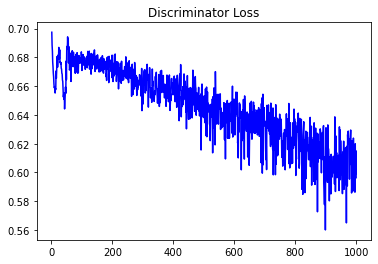

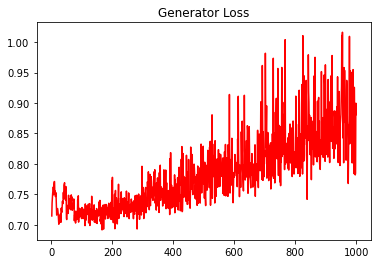

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.49946812698617576


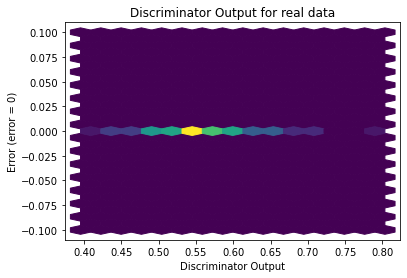

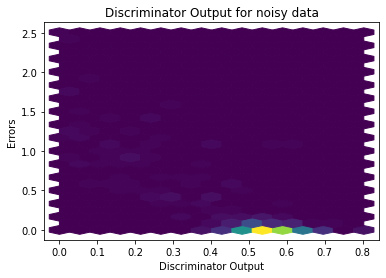

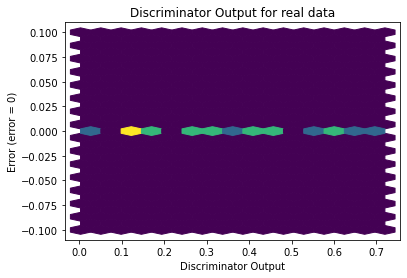

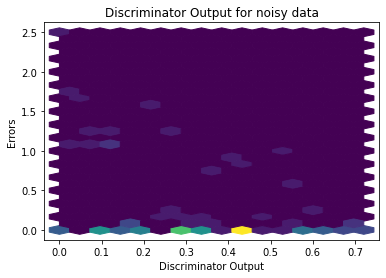

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


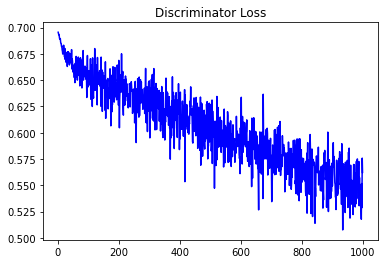

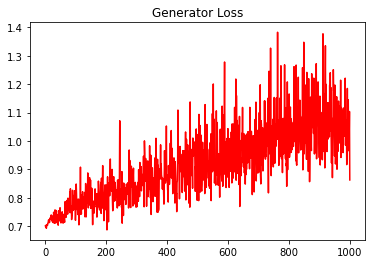

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.5067046569702216


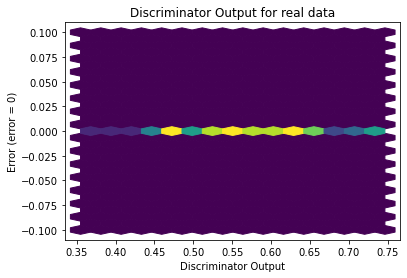

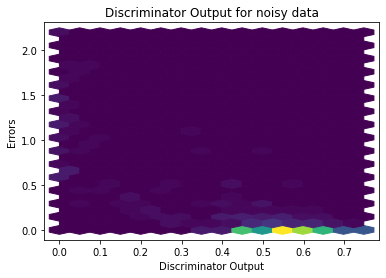

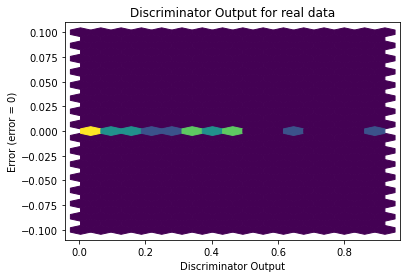

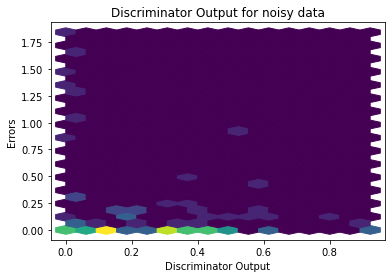

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6598]], requires_grad=True)
